# Google Scholar Search

**Author:** Jack Galbraith-Edge

**Date:** 8th January 2025

## Background
Google Scholar is popular tool for searching grey literature. Unlike databases like PubMed and Embase which are curated, maintained by humans and contain only published literature. Google Scholar, on the other hand, searches the internet for what it believes are academic materials and then displays them in a list. As a result, Google Scholar is excellent for seaching grey literature, as results will include unpublished data such as thesises and other useful material, reducing publication bias and susceptability bias (Haddaway et al., 2015)

Unfortunately, because Google Scholar references the internet in this way and is not itself a database, this can make querying cumbersome and the number of results returned by queries and be overwhelming. 

Following the failure of my experiments with Scholarly, I opted to use SerpAPI to query Google Scholar and clean and manipulate the results to add to my systematic review database/literature search. SerpAPI has a free-tier up to 100 Google Scholar requests per month, so I utilise my free trial and give it a go.

This document details my search queries and how I've tailored them to gather an appropriate number of results.

## Important
The result limit in my query function is set to 300. This is because some research exists to researches should focus on the first 200-300 results, with useful resources being found after the 80 result mark (Haddaway et al., 2015).

## Setup

In [48]:
from notebook_setup import *
from helpers import *

## Queries

Here I will try multiple queries to see how many results I get.

In [25]:
# create dictionary to store search query and results in for ease of reference later.
results_dict = {}

# Query One
query_one =  '("foreign obj*" OR "foreign bod*")' 
# Run search
results_one = search_google_scholar(query_one, SERP_API_KEY)
# Add results to dictionary
results_dict = append_google_scholar_results_to_dictionary(query_one, results_one, results_dict)

# Query Two
query_two = """
            ("foreign obj*" OR "foreign bod*")
            AND
            ("intent*" OR "deliberate*" OR "purpose*" OR "self-injur*" OR "selfharm*" OR "self-harm*")
            """
# Run search
results_two = search_google_scholar(query_two, SERP_API_KEY)
# Add results to dictionary
results_dict = append_google_scholar_results_to_dictionary(query_two, results_two, results_dict)

# Query Three
query_three = """
            ("foreign obj*" OR "foreign bod*")
            AND
            ("intent*" OR "deliberate*" OR "purpose*" OR "self-injur*" OR "selfharm*" OR "self-harm*")
            AND
            ("ingest*" OR "swallow*")
            """
# Run search
results_three = search_google_scholar(query_three, SERP_API_KEY)
# Add results to dictionary
results_dict = append_google_scholar_results_to_dictionary(query_three, results_three, results_dict)

# Query Four
# Define google scholar query
query_four = """
            ("foreign obj*" OR "foreign bod*")
            AND
            ("intent*" OR "deliberate*" OR "purpose*" OR "self-injur*" OR "selfharm*" OR "self-harm*")
            AND
            ("ingest*" OR "swallow*"))
            AND
            ("surg*" OR "endoscop*" OR "EGD" OR "OGD" OR "Esophagogastroduodenoscopy" OR "Oesophagogastroduodenoscopy" OR "manag*")"
            """
# Run search
results_four = search_google_scholar(query_four, SERP_API_KEY)
# Add results to dictionary
results_dict = append_google_scholar_results_to_dictionary(query_four, results_four, results_dict)

Searching Google Scholar: ("foreign obj*" OR "foreign bod*")
Fetched 20 results so far...
Fetched 40 results so far...
Fetched 60 results so far...
Fetched 80 results so far...
Fetched 100 results so far...
Fetched 120 results so far...
Fetched 140 results so far...
Fetched 160 results so far...
Fetched 180 results so far...
Fetched 200 results so far...
Fetched 220 results so far...
Fetched 240 results so far...
Fetched 260 results so far...
Fetched 280 results so far...
Fetched 300 results so far...
Maximum number of 300 results reached.
Searching Google Scholar: 
            ("foreign obj*" OR "foreign bod*")
            AND
            ("intent*" OR "deliberate*" OR "purpose*" OR "self-injur*" OR "selfharm*" OR "self-harm*")
            
Fetched 20 results so far...
Fetched 40 results so far...
Fetched 60 results so far...
Fetched 80 results so far...
Fetched 100 results so far...
Fetched 120 results so far...
Fetched 140 results so far...
Fetched 160 results so far...
Fetched 180 

### Query Summary

In [27]:
# Show number of results for each query and store in dataframe
results_summary = create_search_query_summary(results_dict)

# export queries and associated results count to review with supervisor.
export_search_result_summary_to_csv(results_summary, RAW_DATA_DIR)

In [28]:
# Export each search result dataframe to CSV
export_search_results_to_csvs(results_dict, RAW_DATA_DIR)

## Clean

In [29]:
# import google_df from previously exported csv
google_df = pd.read_csv("/".join([RAW_DATA_DIR, "google_scholar_results_2.csv"]))

google_df['First Author'] = google_df['First Author'].str.title() # clean first author names
google_df['Publication Title'] = google_df['Publication Title'].str.title() 
google_df['Title'] = google_df['Title'].str.title()
google_df['URL'] = google_df['URL'].str.lower()

google_df

,Publication Year,First Author,Authors,Summary,Publication Title,Title,Abstract,URL,Database,Exclude,Reason ID,Reason
0,1886.0,"Richardson, M.",MH RICHARDSON,MH RICHARDSON - The Boston Medical and Surgica...,The Boston Medical And Surgical Journal,A Case Of Gastrotomy. Digital Exploration Of Œ...,Many cases have been recorded where foreign bo...,https://www.nejm.org/doi/pdf/10.1056/nejm18861...,Google Scholar,NaN,NaN,NaN
1,1895.0,"Morrison, W.",WA MORRISON,WA MORRISON - The Boston Medical and Surgical ...,The Boston Medical And Surgical Journal,The Value Of The Stomach-Tube In Feeding After...,By this method I fed the child with the tube f...,https://www.nejm.org/doi/pdf/10.1056/nejm18950...,Google Scholar,NaN,NaN,NaN
2,1907.0,"Killian, G.",G Killian,"G Killian - Annals of Otology, Rhinology & Lar...",Annals Of Otology,Xx. The Treatment Of Foreign Bodies In The Res...,The invitation of your President to deliver an...,https://journals.sagepub.com/doi/abs/10.1177/0...,Google Scholar,NaN,NaN,NaN
3,1917.0,"Benedetto, M.",M DI BENEDETTO,M DI BENEDETTO - REHABILITATION OF THE INJURED...,Rehabilitation Of The Injured …,Cranial Neuropathies: Electro-Diagnosis And Ma...,"CONCLUSION * Colonel Medical Corps, US Army (R...",https://upload.wikimedia.org/wikipedia/commons...,Google Scholar,NaN,NaN,NaN
4,1917.0,"Ritter, T.",TJ Ritter,"TJ Ritter - Nursing, 1917 - uk.i-scream.org",Nursing,Mother'S Remedies,╨╧*αí▒*ß>*■ *¡zV*|V*╠U*═U╬U╧U╨U╤U╥U╙U╘U╒U╓U╫U╪...,ftp://ftp.uk.i-scream.org/sites/gutenberg.org/...,Google Scholar,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
129,NaN,"Illenyi, J.","J Hirschberg, T Szende, P Koltai, A Illenyi","J Hirschberg, T Szende, P Koltai, A Illenyi - ...",NaN,"Pediatric Airway: Cry, Stridor And Cough",This multidisciplinary book describes 42 diffe...,https://books.google.com/books?hl=en&lr=&id=z1...,Google Scholar,NaN,NaN,NaN
130,NaN,"Coonar, F.","FC Wells, AS Coonar","FC Wells, AS Coonar - 2018 - books.google.com",NaN,Thoracic Surgical Techniques,This heavily revised second edition of this bo...,https://books.google.com/books?hl=en&lr=&id=nz...,Google Scholar,NaN,NaN,NaN
131,NaN,"Davis, E.",EP Davis,EP Davis - 1917 - books.google.com,NaN,Obstetric And Gynecologic Nursing,CHAPTER I DEFINITION OF PREGNANCY; THE GROWTH ...,https://books.google.com/books?hl=en&lr=&id=5g...,Google Scholar,NaN,NaN,NaN
132,NaN,"Sekouba, B.",B Sekouba,B Sekouba - 1996 - 34.250.91.188,NaN,Studies On The Cellular And Humoral Immune Res...,Amblyomma variegatum and Rhipicephalus appendi...,http://34.250.91.188:8080/xmlui/handle/1234567...,Google Scholar,NaN,NaN,NaN


### Duplicate Removal

In [30]:
start_count = len(google_df)
google_df = google_df.drop_duplicates(subset=google_df.columns, keep='first')
end_count = len(google_df)

duplicates_removed_count = end_count - start_count

print(f"{duplicates_removed_count} duplicates were removed at this stage.")


0 duplicates were removed at this stage.


### Title and Abstract Review

In [31]:
# export for title and abstract review
google_df.to_csv(os.path.join(RAW_DATA_DIR, "google_school_title_abstract_screen_start_1.csv"))

At this stage, after discussing with my supervisor and a librarian, it is decided that the 135 result search strategy would suffice. 
The results were exported to CSV and the URLs were accessed to access title and abstracts. 
Abstracts - where available - were transferred to the spreadsheet using Microsoft excel and exclusion criteria were applied.

In [32]:
# clean exported csv to normalise characters for reimport
file_path = "/".join([PROC_DATA_DIR, "google_scholar_title_abstract_screen_end_1.csv"])

# Open the file, replace problematic characters, and load it
with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
    content = f.read().replace("\xe2", " ")

# Save the cleaned content to a temporary file or load it directly
cleaned_file_path = "/".join([PROC_DATA_DIR, "cleaned_google_scholar_title_abstract_screen_end_1.csv"])
with open(cleaned_file_path, "w", encoding="utf-8") as f:
    f.write(content)

At this stage, I opened the cleaned google scholar title and abstract spreadsheet in excel and did the following:
1. Read the title
2. Read the abstract
3. If either title and abstract are unavailble, I used available data in the row to find the reference using google scholar manual search, or google search. 
4. If the result was found, I then updated the information in the row for the result, adding a DOI column and updating the Publication Date
5. Marked any duplicates 

In [33]:
# reimport screened results

# Define the file path
file_path = "/".join([PROC_DATA_DIR, "cleaned_google_scholar_title_abstract_screen_end_1.csv"])

# Read and clean the CSV file
with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
    content = f.read()

# Replace problematic characters
cleaned_content = content.replace("\xe2", " ")

# Save the cleaned content to a temporary file (optional, if you want to keep it)
temp_file_path = "/".join([PROC_DATA_DIR, "cleaned_temp_file.csv"])
with open(temp_file_path, "w", encoding="utf-8") as temp_file:
    temp_file.write(cleaned_content)

# Load the cleaned content into a pandas DataFrame
google_df = pd.read_csv(temp_file_path)


In [34]:
# define exclusion criteria

exclusion_criteria = {
    1: "Full text not available in English.",
    2: "Studies not focusing on intentional ingestion of foreign object via the oral cavity (mouth).",
    3: "Studies focussing solely on accidental ingestion.",
    4: "Non-Human/Animal studies.",
    5: "Reviews, editorials, commentaries, and opinion pieces without original empirical data.",
    6: "Duplicate publications or studies with overlapping data sets (the most comprehensive or recent study will be included).",
    7: "Studies focusing on ingestion of substances (e.g. poisons, medications) rather than physical foreign objects.",
    8: "Ingestions undertaken in controlled environment as part of voluntary study."
}

In [35]:
# duplicates in dataframe
duplicate_results = google_df[google_df['Duplicate'] == True]

print(f"{len(duplicate_results)} duplicates were manually removed in title and abstract screening.")

3 duplicates were manually removed in title and abstract screening.


In [39]:
# remove duplicates from google dataframe
google_df = google_df[google_df['Duplicate'] != True]

# create dataframe to store results that were excluded during title and abstract screening
excluded_results = google_df[google_df['Exclude'] == True]

# calculate number of results excluded during title and abstract screening
num_excluded = len(excluded_results)

# create dataframe to store results that were not excluded during title and abstract screening
not_excluded_results = google_df[google_df['Exclude'] != True]

# calculate number of remaining results
num_not_excluded = len(not_excluded_results)

# print results
print(f"{num_excluded} results were excluded in title and abstract screening.")
print(f"{num_not_excluded} google scholar results remain after duplicate removal and title and abstract screening.")


79 results were excluded in title and abstract screening.
53 google scholar results remain after duplicate removal and title and abstract screening.


In [40]:
# count number of results excluded
exclusion_count = len(excluded_results)

# convert reason id to type integer, not float (decimal)
excluded_results['Reason ID'] = excluded_results['Reason ID'].astype('Int64')

# create exclusion reasoning dataframa which counts the number of times each exclusion criteria is found in the reason ID column
exclusion_reasoning = excluded_results['Reason ID'].value_counts().reset_index(name='Count')

# map the exclusion criteria to the reason ID to make 'Reason' column
exclusion_reasoning['Reason'] = exclusion_reasoning['Reason ID'].map(exclusion_criteria)

# print exclusion reasoning column
exclusion_reasoning

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_50213/3736960975.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  excluded_results['Reason ID'] = excluded_results['Reason ID'].astype('Int64')


,Reason ID,Count,Reason
0,5,23,"Reviews, editorials, commentaries, and opinion..."
1,2,22,Studies not focusing on intentional ingestion ...
2,4,19,Non-Human/Animal studies.
3,1,9,Full text not available in English.
4,3,3,Studies focussing solely on accidental ingestion.
5,7,2,Studies focusing on ingestion of substances (e...


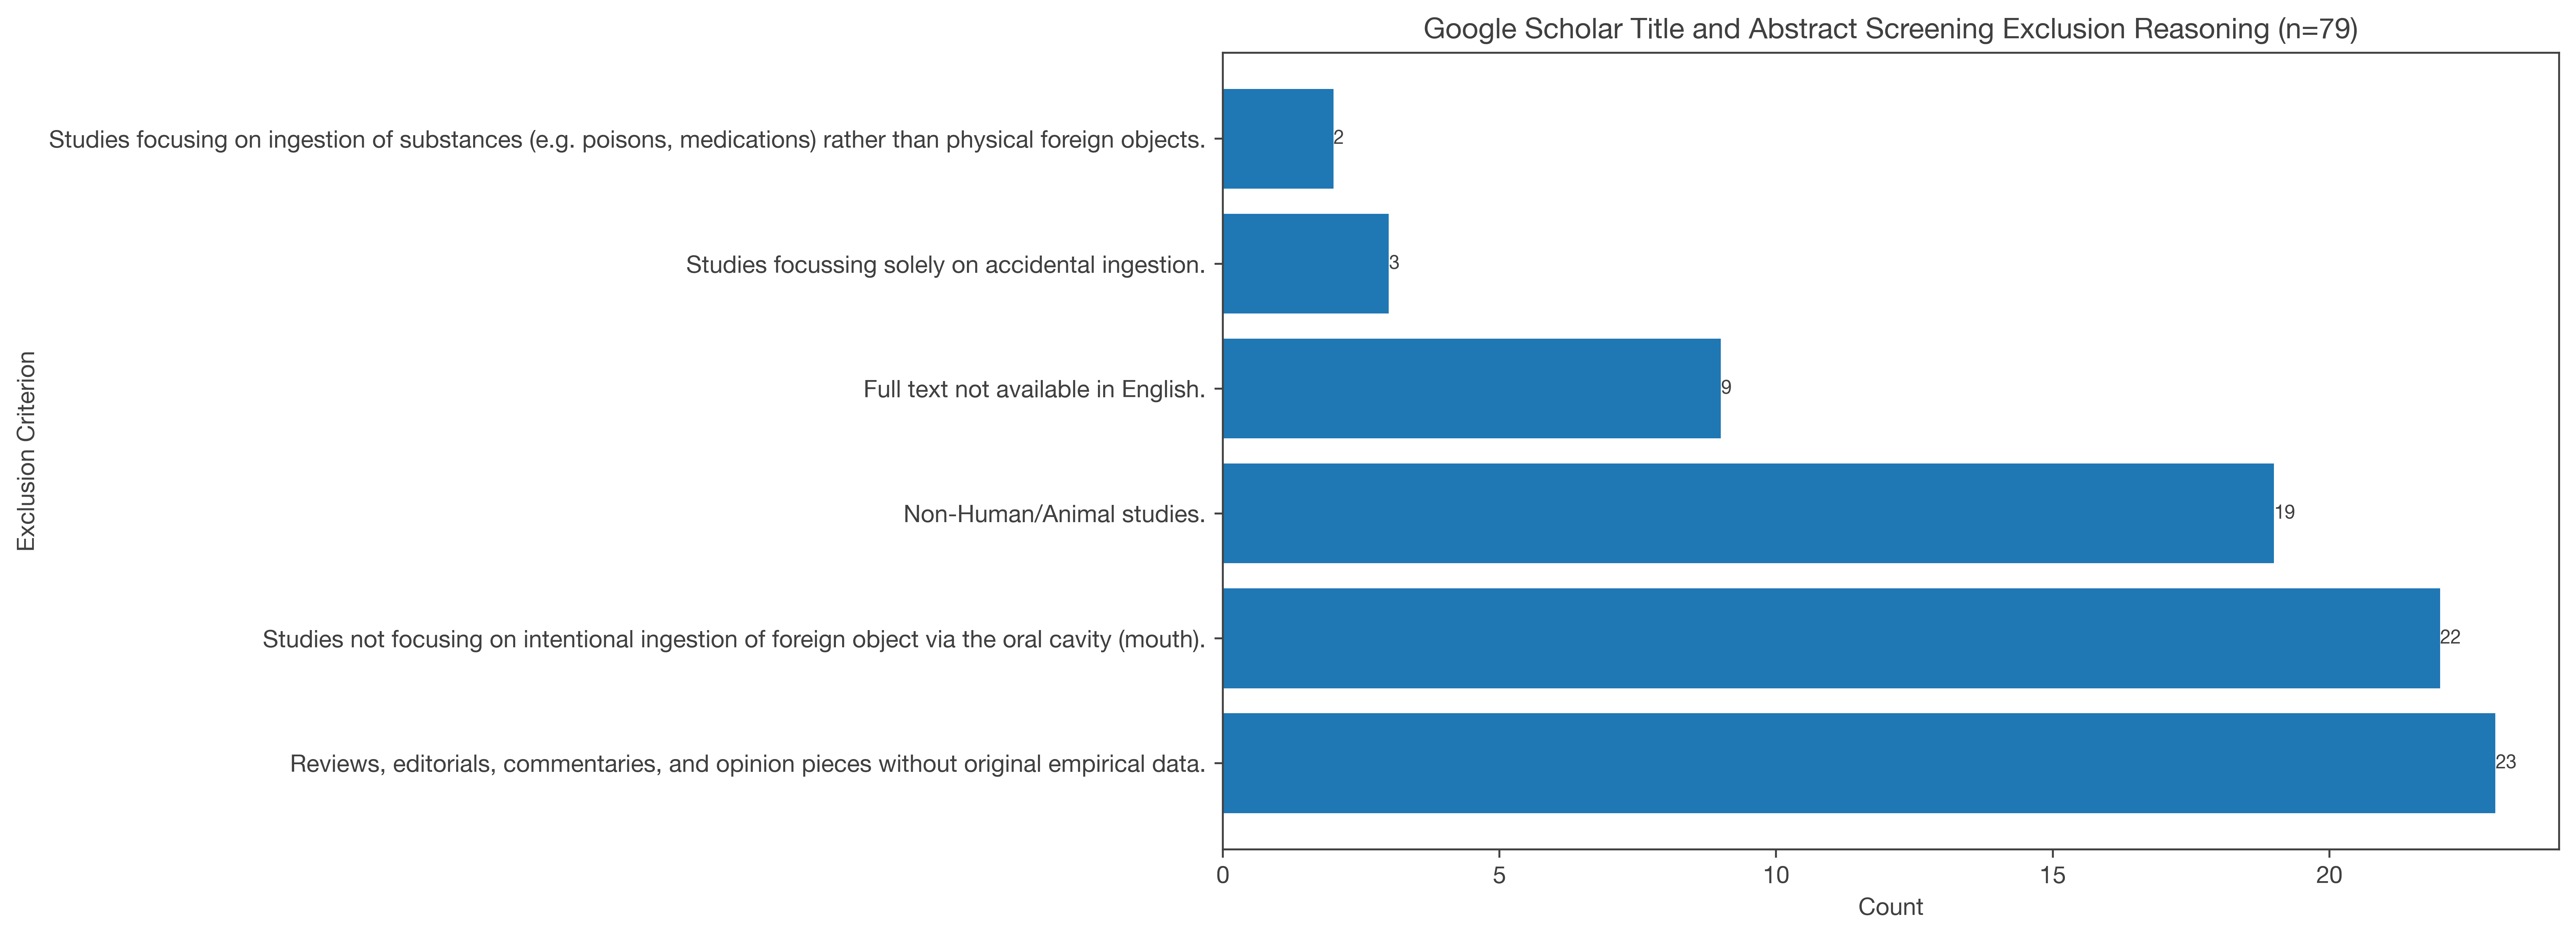

In [41]:
# plot exclusion reasoning in horizontal bar
plt.barh(y=exclusion_reasoning['Reason'], 
         width=exclusion_reasoning['Count']) # width of bar is exclusion reason count
plt.title(f"Google Scholar Title and Abstract Screening Exclusion Reasoning (n={exclusion_count})") # plot title
plt.xlabel("Count") # x-axis label
plt.ylabel("Exclusion Criterion") # y-axis label

# label each bar
for i, row in exclusion_reasoning.iterrows():
    # place the text label at the end of each bar
    plt.text(row['Count'], i, str(row['Count']), 
             ha='left', va='center', fontsize=8)
    
plt.show() # show plot

### Export data

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_50213/4158972500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_df['Publication Year'] = pd.to_numeric(google_df['Publication Year'], errors='coerce')
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_50213/4158972500.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_df['Publication Year'] = google_df['Publication Year'].fillna(0).astype(int)


,Publication Year,First Author,Authors,Summary,Publication Title,Title,Abstract,URL,Database,DOI,Duplicate,Exclude,Reason ID,Abstract2,Unnamed: 14
0,1886,"Richardson, M.",MH RICHARDSON,MH RICHARDSON - The Boston Medical and Surgica...,The Boston Medical And Surgical Journal,A Case Of Gastrotomy. Digital Exploration Of s...,Many cases have been recorded where foreign bo...,https://www.nejm.org/doi/pdf/10.1056/nejm18861...,Google Scholar,10.1056/NEJM188612161152403,NaN,False,NaN,Abstract not available,NaN
1,1895,"Morrison, W.",WA MORRISON,WA MORRISON - The Boston Medical and Surgical ...,The Boston Medical And Surgical Journal,The Value Of The Stomach-Tube In Feeding After...,By this method I fed the child with the tube f...,https://www.nejm.org/doi/pdf/10.1056/nejm18950...,Google Scholar,10.1056/NEJM189502071320604,NaN,True,2.0,Abstract not available,NaN
2,1907,"Killian, G.",G Killian,"G Killian - Annals of Otology, Rhinology & Lar...",Annals Of Otology,Xx. The Treatment Of Foreign Bodies In The Res...,The invitation of your President to deliver an...,https://journals.sagepub.com/doi/abs/10.1177/0...,Google Scholar,10.1177/000348940701600201,NaN,False,NaN,Abstract not available,NaN
3,1917,"Benedetto, M.",M DI BENEDETTO,M DI BENEDETTO - REHABILITATION OF THE INJURED...,Rehabilitation Of The Injured ...,Cranial Neuropathies: Electro-Diagnosis And Ma...,"CONCLUSION * Colonel Medical Corps, US Army (R...",https://upload.wikimedia.org/wikipedia/commons...,Google Scholar,NaN,NaN,True,5.0,Abstract not available,NaN
4,1917,"Ritter, T.",TJ Ritter,"TJ Ritter - Nursing, 1917 - uk.i-scream.org",Nursing,Mother'S Remedies,╨╧*αí▒*ß>*■ *¡zV*|V*╠U*═U╬U╧U╨U╤U╥U╙U╘U╒U╓U╫U╪...,ftp://ftp.uk.i-scream.org/sites/gutenberg.org/...,Google Scholar,NaN,NaN,True,5.0,Abstract not available,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2008,"Illenyi, J.","J Hirschberg, T Szende, P Koltai, A Illenyi","J Hirschberg, T Szende, P Koltai, A Illenyi - ...",NaN,"Pediatric Airway: Cry, Stridor And Cough",This multidisciplinary book describes 42 diffe...,https://books.google.lk/books?hl=en&lr=&id=Z1o...,Google Scholar,NaN,NaN,False,NaN,Abstract not available,NaN
131,2018,"Coonar, F.","FC Wells, AS Coonar","FC Wells, AS Coonar - 2018 - books.google.com",NaN,Thoracic Surgical Techniques,This heavily revised second edition of this bo...,https://books.google.lk/books?hl=en&lr=&id=nzp...,Google Scholar,NaN,NaN,True,5.0,Abstract not available,NaN
132,1917,"Davis, E.",EP Davis,EP Davis - 1917 - books.google.com,NaN,Obstetric And Gynecologic Nursing,CHAPTER I DEFINITION OF PREGNANCY; THE GROWTH ...,https://scholar.google.com/scholar?cluster=156...,Google Scholar,NaN,NaN,True,1.0,Abstract not available,NaN
133,1996,"Sekouba, B.",B Sekouba,B Sekouba - 1996 - 34.250.91.188,NaN,Studies On The Cellular And Humoral Immune Res...,Amblyomma variegatum and Rhipicephalus appendi...,http://34.250.91.188:8080/xmlui/handle/1234567...,Google Scholar,NaN,NaN,True,4.0,Amblyomma variegatum and Rhipicephalus appendi...,NaN


,Publication Year,First Author,Authors,Summary,Publication Title,Title,Abstract,URL,Database,DOI,Duplicate,Exclude,Reason ID,Abstract2,Unnamed: 14
0,1886,"Richardson, M.",MH RICHARDSON,MH RICHARDSON - The Boston Medical and Surgica...,The Boston Medical And Surgical Journal,A Case Of Gastrotomy. Digital Exploration Of s...,Many cases have been recorded where foreign bo...,https://www.nejm.org/doi/pdf/10.1056/nejm18861...,Google Scholar,10.1056/NEJM188612161152403,NaN,False,NaN,Abstract not available,NaN
1,1895,"Morrison, W.",WA MORRISON,WA MORRISON - The Boston Medical and Surgical ...,The Boston Medical And Surgical Journal,The Value Of The Stomach-Tube In Feeding After...,By this method I fed the child with the tube f...,https://www.nejm.org/doi/pdf/10.1056/nejm18950...,Google Scholar,10.1056/NEJM189502071320604,NaN,True,2.0,Abstract not available,NaN
2,1907,"Killian, G.",G Killian,"G Killian - Annals of Otology, Rhinology & Lar...",Annals Of Otology,Xx. The Treatment Of Foreign Bodies In The Res...,The invitation of your President to deliver an...,https://journals.sagepub.com/doi/abs/10.1177/0...,Google Scholar,10.1177/000348940701600201,NaN,False,NaN,Abstract not available,NaN
3,1917,"Benedetto, M.",M DI BENEDETTO,M DI BENEDETTO - REHABILITATION OF THE INJURED...,Rehabilitation Of The Injured ...,Cranial Neuropathies: Electro-Diagnosis And Ma...,"CONCLUSION * Colonel Medical Corps, US Army (R...",https://upload.wikimedia.org/wikipedia/commons...,Google Scholar,NaN,NaN,True,5.0,Abstract not available,NaN
4,1917,"Ritter, T.",TJ Ritter,"TJ Ritter - Nursing, 1917 - uk.i-scream.org",Nursing,Mother'S Remedies,╨╧*αí▒*ß>*■ *¡zV*|V*╠U*═U╬U╧U╨U╤U╥U╙U╘U╒U╓U╫U╪...,ftp://ftp.uk.i-scream.org/sites/gutenberg.org/...,Google Scholar,NaN,NaN,True,5.0,Abstract not available,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2008,"Illenyi, J.","J Hirschberg, T Szende, P Koltai, A Illenyi","J Hirschberg, T Szende, P Koltai, A Illenyi - ...",NaN,"Pediatric Airway: Cry, Stridor And Cough",This multidisciplinary book describes 42 diffe...,https://books.google.lk/books?hl=en&lr=&id=Z1o...,Google Scholar,NaN,NaN,False,NaN,Abstract not available,NaN
131,2018,"Coonar, F.","FC Wells, AS Coonar","FC Wells, AS Coonar - 2018 - books.google.com",NaN,Thoracic Surgical Techniques,This heavily revised second edition of this bo...,https://books.google.lk/books?hl=en&lr=&id=nzp...,Google Scholar,NaN,NaN,True,5.0,Abstract not available,NaN
132,1917,"Davis, E.",EP Davis,EP Davis - 1917 - books.google.com,NaN,Obstetric And Gynecologic Nursing,CHAPTER I DEFINITION OF PREGNANCY; THE GROWTH ...,https://scholar.google.com/scholar?cluster=156...,Google Scholar,NaN,NaN,True,1.0,Abstract not available,NaN
133,1996,"Sekouba, B.",B Sekouba,B Sekouba - 1996 - 34.250.91.188,NaN,Studies On The Cellular And Humoral Immune Res...,Amblyomma variegatum and Rhipicephalus appendi...,http://34.250.91.188:8080/xmlui/handle/1234567...,Google Scholar,NaN,NaN,True,4.0,Amblyomma variegatum and Rhipicephalus appendi...,NaN


## Bibliography

1.	Haddaway NR, Collins AM, Coughlin D, Kirk S. The Role of Google Scholar in Evidence Reviews and Its Applicability to Grey Literature Searching. Wray KB, editor. PLoS ONE. 2015 Sep 17;10(9):e0138237. 